In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

!pip install numpy==1.15
!curl -s https://course.fast.ai/setup/colab | bash

     |████████████████████████████████| 13.9MB 9.0MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.16.4
    Uninstalling numpy-1.16.4:
      Successfully uninstalled numpy-1.16.4


Updating fastai...
Done.


In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

# Loading Text Files Containing Image URLs

In [2]:
!wget https://raw.githubusercontent.com/RRamirez21/ThinkfulDrills/master/Data%20Files/Rickenbacker%20360.txt
!wget https://raw.githubusercontent.com/RRamirez21/ThinkfulDrills/master/Data%20Files/Fender%20Jaguar.txt
!wget https://raw.githubusercontent.com/RRamirez21/ThinkfulDrills/master/Data%20Files/Fender%20Telecaster.txt
!wget https://raw.githubusercontent.com/RRamirez21/ThinkfulDrills/master/Data%20Files/Gibson%20ES335.txt
!wget https://raw.githubusercontent.com/RRamirez21/ThinkfulDrills/master/Data%20Files/Ibanez%20Iceman.txt
!wget https://raw.githubusercontent.com/RRamirez21/ThinkfulDrills/master/Data%20Files/Gibson%20SG.txt
!wget https://raw.githubusercontent.com/RRamirez21/ThinkfulDrills/master/Data%20Files/Gibson%20LP.txt
!wget https://raw.githubusercontent.com/RRamirez21/ThinkfulDrills/master/Data%20Files/Gibson%20FlyingV.txt
!wget https://raw.githubusercontent.com/RRamirez21/ThinkfulDrills/master/Data%20Files/Fender%20Stratocaster.txt
!wget https://raw.githubusercontent.com/RRamirez21/ThinkfulDrills/master/Data%20Files/Gibson%20Explorer.txt
!wget https://raw.githubusercontent.com/RRamirez21/ThinkfulDrills/master/Data%20Files/Gibson%20Firebird.txt  
!wget https://raw.githubusercontent.com/RRamirez21/ThinkfulDrills/master/Data%20Files/Gretsch%205120.txt

--2019-07-31 01:29:38--  https://raw.githubusercontent.com/RRamirez21/ThinkfulDrills/master/Data%20Files/Rickenbacker%20360.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21802 (21K) [text/plain]
Saving to: ‘Rickenbacker 360.txt’

Rickenbacker 360.tx 100%[===================>]  21.29K  --.-KB/s    in 0.003s  

2019-07-31 01:29:39 (6.02 MB/s) - ‘Rickenbacker 360.txt’ saved [21802/21802]

--2019-07-31 01:29:40--  https://raw.githubusercontent.com/RRamirez21/ThinkfulDrills/master/Data%20Files/Fender%20Jaguar.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting respo

In [3]:
!cat Fender Telecaster.txt.1

cat: Fender: No such file or directory
cat: Telecaster.txt.1: No such file or directory


In [0]:
filenames = ['Fender Jaguar.txt',	'Gibson FlyingV.txt', 'Rickenbacker 360.txt', 
             'Fender Stratocaster.txt',  'Gibson LP.txt',	 'Gibson Firebird.txt',
             'Fender Telecaster.txt',    'Gibson SG.txt',	  'Gibson ES335.txt',
             'Gretsch 5120.txt', 'Gibson Explorer.txt',	   'Ibanez Iceman.txt']

guitars = {filename.replace('.txt', ''):filename for filename in filenames} # this is a list comprehension


  
path = Path('data/guitars')

for guitar_name in guitars.keys():
  folder = guitar_name
  dest = path/folder  
  dest.mkdir(parents=True, exist_ok=True)
  download_images(guitars[guitar_name], dest, max_pics=200)

  verify_images(dest, delete=True, size=500)

In [5]:
!ls ./data/guitars

'Fender Jaguar'        'Gibson ES335'	  'Gibson FlyingV'  'Gretsch 5120'
'Fender Stratocaster'  'Gibson Explorer'  'Gibson LP'	    'Ibanez Iceman'
'Fender Telecaster'    'Gibson Firebird'  'Gibson SG'	    'Rickenbacker 360'


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [7]:
data.classes

['Fender Jaguar',
 'Fender Stratocaster',
 'Fender Telecaster',
 'Gibson ES335',
 'Gibson Explorer',
 'Gibson Firebird',
 'Gibson FlyingV',
 'Gibson LP',
 'Gibson SG',
 'Gretsch 5120',
 'Ibanez Iceman',
 'Rickenbacker 360']

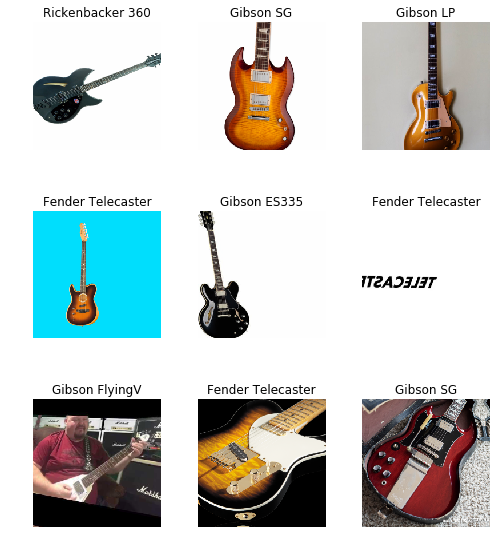

In [8]:
data.show_batch(rows=3, figsize=(7,8))

In [9]:
data.c, len(data.train_ds), len(data.valid_ds)

(12, 1732, 432)

# Creating the Convolutional Neural Network

In [10]:
learn = cnn_learner(data, models.resnet34, path='.', metrics=error_rate)
learn.fit_one_cycle(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:03<00:00, 28363365.05it/s]


epoch,train_loss,valid_loss,error_rate,time
0,2.001121,1.221658,0.398148,01:37


In [0]:
learn.save('stage-1')

In [0]:
learn.load('stage-1')
learn.unfreeze()

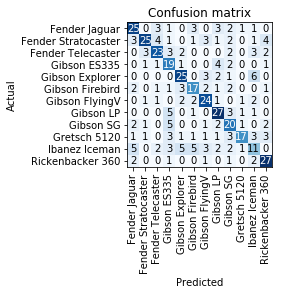

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


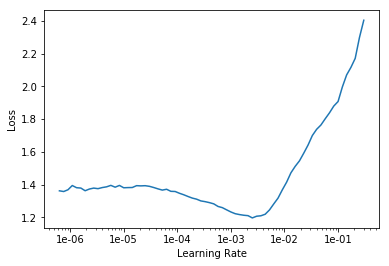

In [14]:
learn.lr_find(); 
learn.recorder.plot()

In [15]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-06,1e-03))

epoch,train_loss,valid_loss,error_rate,time
0,1.297111,0.997241,0.310185,01:35
1,1.104053,0.760151,0.240741,01:35
2,0.909053,0.679839,0.215278,01:34
3,0.786386,0.669539,0.222222,01:34


In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage-2')
learn.unfreeze()

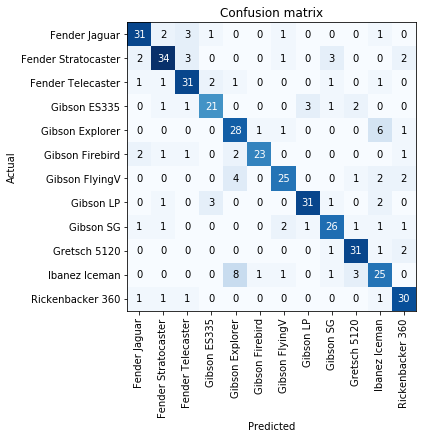

In [18]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(8,6))

In [19]:
display(interp.most_confused(min_val=2))

[('Ibanez Iceman', 'Gibson Explorer', 8),
 ('Gibson Explorer', 'Ibanez Iceman', 6),
 ('Gibson FlyingV', 'Gibson Explorer', 4),
 ('Fender Jaguar', 'Fender Telecaster', 3),
 ('Fender Stratocaster', 'Fender Telecaster', 3),
 ('Fender Stratocaster', 'Gibson SG', 3),
 ('Gibson ES335', 'Gibson LP', 3),
 ('Gibson LP', 'Gibson ES335', 3),
 ('Ibanez Iceman', 'Gretsch 5120', 3),
 ('Fender Jaguar', 'Fender Stratocaster', 2),
 ('Fender Stratocaster', 'Fender Jaguar', 2),
 ('Fender Stratocaster', 'Rickenbacker 360', 2),
 ('Fender Telecaster', 'Gibson ES335', 2),
 ('Gibson ES335', 'Gretsch 5120', 2),
 ('Gibson Firebird', 'Fender Jaguar', 2),
 ('Gibson Firebird', 'Gibson Explorer', 2),
 ('Gibson FlyingV', 'Ibanez Iceman', 2),
 ('Gibson FlyingV', 'Rickenbacker 360', 2),
 ('Gibson LP', 'Ibanez Iceman', 2),
 ('Gibson SG', 'Gibson FlyingV', 2),
 ('Gretsch 5120', 'Rickenbacker 360', 2)]

# Level up: ResNet 50

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:00<00:00, 161629560.55it/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.983035,0.938811,0.307870,01:35
1,1.321935,0.831128,0.268519,01:34
2,0.991567,0.761994,0.236111,01:34
3,0.808588,0.745470,0.226852,01:34


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


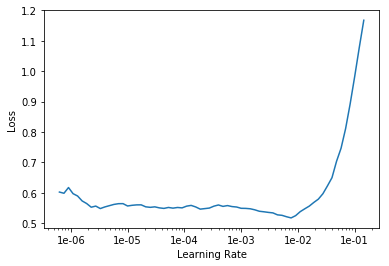

In [20]:
learn = cnn_learner(data, models.resnet50, path='.', metrics=error_rate)
learn.fit_one_cycle(4)
learn.freeze()
learn.lr_find(); 
learn.recorder.plot()

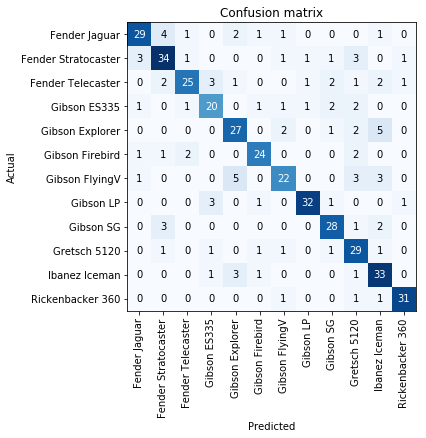

In [21]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(8,6))

In [22]:
interp.most_confused()

[('Gibson Explorer', 'Ibanez Iceman', 5),
 ('Gibson FlyingV', 'Gibson Explorer', 5),
 ('Fender Jaguar', 'Fender Stratocaster', 4),
 ('Fender Stratocaster', 'Fender Jaguar', 3),
 ('Fender Stratocaster', 'Gretsch 5120', 3),
 ('Fender Telecaster', 'Gibson ES335', 3),
 ('Gibson FlyingV', 'Gretsch 5120', 3),
 ('Gibson FlyingV', 'Ibanez Iceman', 3),
 ('Gibson LP', 'Gibson ES335', 3),
 ('Gibson SG', 'Fender Stratocaster', 3),
 ('Ibanez Iceman', 'Gibson Explorer', 3),
 ('Fender Jaguar', 'Gibson Explorer', 2),
 ('Fender Telecaster', 'Fender Stratocaster', 2),
 ('Fender Telecaster', 'Gibson SG', 2),
 ('Fender Telecaster', 'Ibanez Iceman', 2),
 ('Gibson ES335', 'Gibson SG', 2),
 ('Gibson ES335', 'Gretsch 5120', 2),
 ('Gibson Explorer', 'Gibson FlyingV', 2),
 ('Gibson Explorer', 'Gretsch 5120', 2),
 ('Gibson Firebird', 'Fender Telecaster', 2),
 ('Gibson Firebird', 'Gretsch 5120', 2),
 ('Gibson SG', 'Ibanez Iceman', 2),
 ('Fender Jaguar', 'Fender Telecaster', 1),
 ('Fender Jaguar', 'Gibson Firebird

In [0]:
learn.save('stage-3')

In [0]:
learn.load('stage-3')
learn.unfreeze()

In [25]:
learn.unfreeze()
learn.fit_one_cycle(6, max_lr=slice(1e-04,1e-02))

epoch,train_loss,valid_loss,error_rate,time
0,0.682687,1.559897,0.379630,01:35
1,0.908955,3.000740,0.523148,01:34
2,0.892957,1.476487,0.405093,01:35
3,0.778178,0.589282,0.178241,01:35
4,0.600999,0.465273,0.145833,01:35
5,0.456062,0.427390,0.125000,01:35


We have improved the error rate and are now able to correctly identify the guitar model with 87.5% accuracy. Moving forward, we can increase the epoch cycles and adjust the slice to see if accuracy will improve.

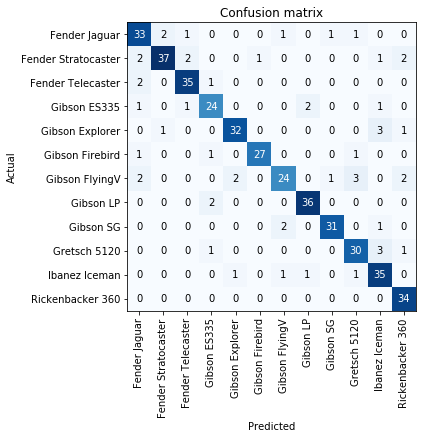

In [26]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(8,6))

In [27]:
interp.most_confused()

[('Gibson Explorer', 'Ibanez Iceman', 3),
 ('Gibson FlyingV', 'Gretsch 5120', 3),
 ('Gretsch 5120', 'Ibanez Iceman', 3),
 ('Fender Jaguar', 'Fender Stratocaster', 2),
 ('Fender Stratocaster', 'Fender Jaguar', 2),
 ('Fender Stratocaster', 'Fender Telecaster', 2),
 ('Fender Stratocaster', 'Rickenbacker 360', 2),
 ('Fender Telecaster', 'Fender Jaguar', 2),
 ('Gibson ES335', 'Gibson LP', 2),
 ('Gibson FlyingV', 'Fender Jaguar', 2),
 ('Gibson FlyingV', 'Gibson Explorer', 2),
 ('Gibson FlyingV', 'Rickenbacker 360', 2),
 ('Gibson LP', 'Gibson ES335', 2),
 ('Gibson SG', 'Gibson FlyingV', 2),
 ('Fender Jaguar', 'Fender Telecaster', 1),
 ('Fender Jaguar', 'Gibson FlyingV', 1),
 ('Fender Jaguar', 'Gibson SG', 1),
 ('Fender Jaguar', 'Gretsch 5120', 1),
 ('Fender Stratocaster', 'Gibson Firebird', 1),
 ('Fender Stratocaster', 'Ibanez Iceman', 1),
 ('Fender Telecaster', 'Gibson ES335', 1),
 ('Gibson ES335', 'Fender Jaguar', 1),
 ('Gibson ES335', 'Fender Telecaster', 1),
 ('Gibson ES335', 'Ibanez Icem

In [0]:
learn.save('stage-4')